In [1]:

import MetaTrader5 as mt5
import pycaret
from pycaret.classification import *
import datetime
from datetime import timedelta
import numpy as np
import pandas as pd


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt                    

import warnings
import matplotlib.pyplot as plt
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
import os

# Obtener la ruta del directorio del notebook actual
directorio_actual = os.getcwd()

# Obtener el nombre de la carpeta del directorio actual
nombre_carpeta_actual = os.path.basename(directorio_actual)

print(nombre_carpeta_actual)
# Inicializar MetaTrader 5
mt5.initialize()

# Definir el símbolo (par de divisas) y la temporalidad
symbol = nombre_carpeta_actual
timeframe = mt5.TIMEFRAME_H1
# Definir el período de tiempo deseado


# Obtener la fecha actual
#fecha_actual = datetime.datetime.now()
fecha_actual = datetime.date.today() + datetime.timedelta(days=1)  
# Calcular la fecha de hace un año a partir de la fecha actual
start_date = fecha_actual - timedelta(days=1440)

# Definir end_date como la fecha actual
end_date = fecha_actual

# Convertir las fechas a objetos Timestamp de pandas
start_date = pd.Timestamp(start_date)
end_date = pd.Timestamp(end_date)

# Obtener datos históricos
historical_data = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)

# Cerrar la conexión a MetaTrader 5
mt5.shutdown()

# Crear un DataFrame de pandas con los datos históricos
df0 = pd.DataFrame(historical_data)

# Convertir las marcas de tiempo en formato legible
#df['time'] = pd.to_datetime(df['time'], unit='s')
#data = df.set_index('time')
df0['time'] = pd.to_datetime(df0['time'], unit='s')
# Extraer los componentes de fecha y hora
df0['hour'] = df0['time'].dt.hour
df0['day'] = df0['time'].dt.day
df0['month'] = df0['time'].dt.month
df0['year'] = df0['time'].dt.year
df_1h=df0
df_1h

USDCAD


,time,open,high,low,close,tick_volume,spread,real_volume,hour,day,month,year
0,2021-11-22 00:00:00,1.26366,1.26446,1.26366,1.26413,158,26,0,0,22,11,2021
1,2021-11-22 01:00:00,1.26411,1.26549,1.26406,1.26544,1508,0,0,1,22,11,2021
2,2021-11-22 02:00:00,1.26544,1.26579,1.26476,1.26500,2576,0,0,2,22,11,2021
3,2021-11-22 03:00:00,1.26498,1.26560,1.26423,1.26514,2840,0,0,3,22,11,2021
4,2021-11-22 04:00:00,1.26514,1.26535,1.26457,1.26489,2287,0,0,4,22,11,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
24575,2025-10-31 11:00:00,1.40019,1.40034,1.39953,1.40020,3160,0,0,11,31,10,2025
24576,2025-10-31 12:00:00,1.40020,1.40097,1.40019,1.40055,2243,0,0,12,31,10,2025
24577,2025-10-31 13:00:00,1.40055,1.40131,1.40041,1.40114,2261,0,0,13,31,10,2025
24578,2025-10-31 14:00:00,1.40114,1.40187,1.40062,1.40142,2784,0,0,14,31,10,2025


In [2]:
import pandas as pd

# Suponiendo que ya tienes un DataFrame con velas de 1 hora:
# df_1h con columnas: ['open','high','low','close','tick_volume']
# Si tienes una columna 'time' con timestamps en segundos
df_1h['time'] = pd.to_datetime(df_1h['time'])  # convertir a datetime
df_1h = df_1h.set_index('time')                # poner 'time' como índice

# Resample a 4H
df_4h = df_1h.resample('1D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'tick_volume': 'sum'
}).dropna()

# Resample a Diario
df_di = df_1h.resample('1W').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'tick_volume': 'sum'
}).dropna()

# RSI function
def rsi(series, period=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    rs = up.rolling(period).mean() / down.rolling(period).mean()
    return 100 - (100 / (1 + rs))

# Calcular RSI en cada timeframe
df_1h['RSI'] = rsi(df_1h['close'])
df_4h['RSI'] = rsi(df_4h['close'])
df_di['RSI'] = rsi(df_di['close'])

df_d=df_di

In [3]:
import pandas as pd

# Suponiendo que ya tienes un DataFrame con velas de 1 hora:
# df_1h con columnas: ['open','high','low','close','tick_volume']
# Si tienes una columna 'time' con timestamps en segundos
#df_1h['time'] = pd.to_datetime(df_1h['time'])  # convertir a datetime
#df_1h = df_1h.set_index('time')                # poner 'time' como índice

# Resample a 4H
df_4h = df_1h.resample('1D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'tick_volume': 'sum'
}).dropna()

# Resample a Diario
df_di = df_1h.resample('1W').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'tick_volume': 'sum'
}).dropna()

# RSI function
def rsi(series, period=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    rs = up.rolling(period).mean() / down.rolling(period).mean()
    return 100 - (100 / (1 + rs))

# Calcular RSI en cada timeframe
df_1h['RSI'] = rsi(df_1h['close'])
df_4h['RSI'] = rsi(df_4h['close'])
df_di['RSI'] = rsi(df_di['close'])

df_d=df_di
import pandas as pd
import numpy as np

# ---------------- utilidades ----------------

def ensure_datetime_index(df, time_col='time'):
    df = df.copy()
    if time_col in df.columns:
        df[time_col] = pd.to_datetime(df[time_col])
        df = df.set_index(time_col)
    df = df.sort_index()
    return df


def pivot_points(series, left=3, right=3):
    n = len(series)
    highs = []
    lows = []
    for i in range(left, n - right):
        window_prev = series.iloc[i-left:i]
        window_next = series.iloc[i+1:i+1+right]
        val = series.iloc[i]
        if val > window_prev.max() and val > window_next.max():
            highs.append(series.index[i])
        if val < window_prev.min() and val < window_next.min():
            lows.append(series.index[i])
    return np.array(highs), np.array(lows)


def cluster_levels(levels, tolerance=0.002):
    if len(levels) == 0:
        return []
    levels = np.array(sorted(levels))
    clusters = []
    current = [levels[0]]
    for lev in levels[1:]:
        if abs(lev - np.mean(current)) <= tolerance * np.mean(current):
            current.append(lev)
        else:
            clusters.append(np.mean(current))
            current = [lev]
    clusters.append(np.mean(current))
    return clusters


def detect_daily_levels(df_di, left=3, right=3, cluster_tol=0.003):
    df = ensure_datetime_index(df_di)
    highs_idx, lows_idx = pivot_points(df['high'], left=left, right=right)
    res_prices = df.loc[highs_idx]['high'].values.tolist()
    sup_prices = df.loc[lows_idx]['low'].values.tolist()
    resistances = cluster_levels(res_prices, tolerance=cluster_tol)
    supports = cluster_levels(sup_prices, tolerance=cluster_tol)
    return {'resistances': resistances, 'supports': supports}


def detect_structural_break(df_4h, level, side='bull', breakout_threshold=0.0015):
    df = ensure_datetime_index(df_4h)
    if side == 'bull':
        cond = df['close'] > level * (1 + breakout_threshold)
    else:
        cond = df['close'] < level * (1 - breakout_threshold)
    if cond.any():
        t = cond[cond].index[0]
        return {'broken': True, 'break_time': t, 'break_price': df.loc[t]['close'], 'direction': side}
    return {'broken': False, 'break_time': None, 'break_price': None, 'direction': side}


def detect_retest_and_entry(df_1h, level, direction, break_time, max_bars_wait=48, retest_tol=0.0015):
    df = ensure_datetime_index(df_1h)
    if break_time is None:
        return {'retested': False, 'retest_time': None, 'entry_price': None, 'signal_side': None}
    start = break_time
    window = df.loc[start: start + pd.Timedelta(hours=max_bars_wait)]
    if window.empty:
        return {'retested': False, 'retest_time': None, 'entry_price': None, 'signal_side': None}

    if direction == 'bull':
        cond = window['low'] <= level * (1 + retest_tol)
        hits = cond[cond].index
        for t in hits:
            candle = window.loc[t]
            if candle['close'] > candle['open'] and candle['close'] >= level * (1 - retest_tol):
                return {'retested': True, 'retest_time': t, 'entry_price': candle['close'], 'signal_side': 'long'}
        return {'retested': False, 'retest_time': None, 'entry_price': None, 'signal_side': None}
    else:
        cond = window['high'] >= level * (1 - retest_tol)
        hits = cond[cond].index
        for t in hits:
            candle = window.loc[t]
            if candle['close'] < candle['open'] and candle['close'] <= level * (1 + retest_tol):
                return {'retested': True, 'retest_time': t, 'entry_price': candle['close'], 'signal_side': 'short'}
        return {'retested': False, 'retest_time': None, 'entry_price': None, 'signal_side': None}


def generate_signals(df_di, df_4h, df_1h, params=None):
    if params is None:
        params = {
            'daily_left': 3,
            'daily_right': 3,
            'cluster_tol': 0.003,
            'breakout_threshold': 0.0015,
            'retest_tol': 0.0015,
            'max_bars_wait': 48
        }
    df_di = ensure_datetime_index(df_di)
    df_4h = ensure_datetime_index(df_4h)
    df_1h = ensure_datetime_index(df_1h)

    levels = detect_daily_levels(df_di, left=params['daily_left'], right=params['daily_right'], cluster_tol=params['cluster_tol'])
    signals = []

    last_price = df_di['close'].iloc[-1]
    for s in levels['supports'] + levels['resistances']:
        if abs(last_price - s) <= params['cluster_tol'] * last_price * 3:
            for side in ['bull', 'bear']:
                br = detect_structural_break(df_4h, s, side=side, breakout_threshold=params['breakout_threshold'])
                if br['broken']:
                    ret = detect_retest_and_entry(df_1h, s, br['direction'], br['break_time'], params['max_bars_wait'], params['retest_tol'])
                    if ret['retested']:
                        signals.append({
                            'level_price': s,
                            'level_type': 'support' if s in levels['supports'] else 'resistance',
                            'break_time_4h': br['break_time'],
                            'break_price_4h': br['break_price'],
                            'retest_time_1h': ret['retest_time'],
                            'entry_price': ret['entry_price'],
                            'side': ret['signal_side']
                        })
    return pd.DataFrame(signals)


def enrich_with_tick_volume(df, period=14):
    df = ensure_datetime_index(df)
    df['tick_vol_ma'] = df['tick_volume'].rolling(period).mean()
    df['tick_vol_strength'] = df['tick_volume'] / df['tick_vol_ma']
    return df

df_di = enrich_with_tick_volume(df_di)
df_4h = enrich_with_tick_volume(df_4h)
df_1h = enrich_with_tick_volume(df_1h)
# ------------------------------------------------------------
# 1️⃣ Detectar zonas de soporte y resistencia (timeframe diario)
# ------------------------------------------------------------
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import fclusterdata

# ------------------------------------------------------------
# Detectar zonas de soporte y resistencia más relevantes
# ------------------------------------------------------------
def detectar_zonas_sr(df, lookback_swing=3, tolerancia=0.0020, min_retests=3):
    """
    Detecta zonas de soporte y resistencia relevantes:
    - lookback_swing: número de velas para definir pivotes locales
    - tolerancia: distancia máxima para agrupar niveles cercanos
    - min_retests: cantidad mínima de pivotes para considerar zona válida
    """
    df = df.copy()

    # 1️⃣ Detectar máximos y mínimos locales
    df['max_local'] = df['high'].rolling(lookback_swing, center=True).max()
    df['min_local'] = df['low'].rolling(lookback_swing, center=True).min()

    pivotes_resistencia = df[df['high'] == df['max_local']]
    pivotes_soporte = df[df['low'] == df['min_local']]

    # 2️⃣ Extraer precios y tiempos
    res_precio = pivotes_resistencia['high'].values.reshape(-1,1)
    res_tiempo = pivotes_resistencia.index.to_numpy()
    sup_precio = pivotes_soporte['low'].values.reshape(-1,1)
    sup_tiempo = pivotes_soporte.index.to_numpy()

    # 3️⃣ Agrupar niveles usando clustering jerárquico (distancia = tolerancia)
    niveles_resistencia = []
    if len(res_precio) > 0:
        clusters_res = fclusterdata(res_precio, t=tolerancia, criterion='distance')
        for c in np.unique(clusters_res):
            mask = clusters_res == c
            if mask.sum() >= min_retests:
                nivel = res_precio[mask].mean()
                tiempo = res_tiempo[mask][-1]
                niveles_resistencia.append({'tipo':'resistencia', 'precio':nivel, 'time':tiempo})

    niveles_soporte = []
    if len(sup_precio) > 0:
        clusters_sup = fclusterdata(sup_precio, t=tolerancia, criterion='distance')
        for c in np.unique(clusters_sup):
            mask = clusters_sup == c
            if mask.sum() >= min_retests:
                nivel = sup_precio[mask].mean()
                tiempo = sup_tiempo[mask][-1]
                niveles_soporte.append({'tipo':'soporte', 'precio':nivel, 'time':tiempo})

    # 4️⃣ Concatenar resultados
    zonas_df = pd.DataFrame(niveles_resistencia + niveles_soporte)
    zonas_df.sort_values('precio', inplace=True)
    zonas_df.reset_index(drop=True, inplace=True)
    return zonas_df
    
    

# ------------------------------------------------------------
# 2️⃣ Detectar quiebres estructurales (4H)
# ------------------------------------------------------------
def detectar_quiebres_estructurales(df_4h, zonas_di, distancia_tolerancia=0.002):
    """
    Detecta quiebres estructurales de soportes o resistencias en temporalidad 4H.
    """
    quiebres = []
    for _, zona in zonas_di.iterrows():
        tipo = zona['tipo']
        nivel = zona['precio']
        for i in range(1, len(df_4h)):
            precio_anterior = df_4h['close'].iloc[i - 1]
            precio_actual = df_4h['close'].iloc[i]

            if tipo == 'soporte' and precio_anterior > nivel and precio_actual < nivel * (1 - distancia_tolerancia):
                quiebres.append({'tipo': 'baja', 'nivel_quebrado': nivel, 'time': df_4h.index[i]})
            elif tipo == 'resistencia' and precio_anterior < nivel and precio_actual > nivel * (1 + distancia_tolerancia):
                quiebres.append({'tipo': 'alza', 'nivel_quebrado': nivel, 'time': df_4h.index[i]})
    return pd.DataFrame(quiebres)


# ------------------------------------------------------------
# 3️⃣ Detectar retests (1H)
# ------------------------------------------------------------
def detectar_retests(df_1h, quiebres_4h, retroceso_tolerancia=0.0015):
    """
    Detecta el retest del nuevo nivel luego del quiebre estructural en 1H.
    """
    retests = []
    for _, q in quiebres_4h.iterrows():
        nivel = q['nivel_quebrado']
        tipo = q['tipo']

        df_post = df_1h[df_1h.index > q['time']].head(40)  # mirar 40 velas después del quiebre

        for i in range(1, len(df_post)):
            precio = df_post['close'].iloc[i]
            if tipo == 'alza' and abs(precio - nivel) / nivel < retroceso_tolerancia:
                retests.append({'signal': 'long', 'nivel': nivel, 'time': df_post.index[i]})
                break
            elif tipo == 'baja' and abs(precio - nivel) / nivel < retroceso_tolerancia:
                retests.append({'signal': 'short', 'nivel': nivel, 'time': df_post.index[i]})
                break
    return pd.DataFrame(retests)

zonas_di = detectar_zonas_sr(df_di)
print("Zonas diarias detectadas:\n", zonas_di)

quiebres_1h = detectar_quiebres_estructurales(df_1h, zonas_di)
print("Quiebres estructurales 1H:\n", quiebres_1h)

retests_1h = detectar_retests(df_1h, quiebres_1h)
print("Retests 1H (señales potenciales):\n", retests_1h)


Zonas diarias detectadas:
           tipo    precio       time
0      soporte  1.261257 2022-03-06
1      soporte  1.331250 2023-05-14
2      soporte  1.337373 2024-02-04
3      soporte  1.348993 2024-04-07
4      soporte  1.358667 2025-07-27
5  resistencia  1.360217 2024-03-24
6  resistencia  1.366980 2024-09-22
7  resistencia  1.378017 2025-07-20
8  resistencia  1.386923 2025-09-14
9  resistencia  1.396103 2024-11-03
Quiebres estructurales 1H:
     tipo  nivel_quebrado                time
0   baja        1.261257 2022-03-22 13:00:00
1   baja        1.331250 2022-09-19 17:00:00
2   baja        1.331250 2023-06-15 16:00:00
3   baja        1.337373 2023-01-31 17:00:00
4   baja        1.337373 2023-04-13 18:00:00
5   baja        1.337373 2023-05-10 15:00:00
6   baja        1.348993 2022-11-10 15:00:00
7   baja        1.348993 2023-06-01 18:00:00
8   baja        1.358667 2022-10-04 18:00:00
9   baja        1.358667 2022-11-04 15:00:00
10  baja        1.358667 2022-12-13 15:00:00
11  baja 

In [4]:
# ------------------------------------------------------------
# 1️⃣ Detectar zonas de soporte y resistencia (timeframe diario)
# ------------------------------------------------------------
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import fclusterdata

# ------------------------------------------------------------
# 1️⃣ Detectar zonas de soporte y resistencia (timeframe diario)
# ------------------------------------------------------------
def detectar_zonas_sr(df, lookback_swing=3, tolerancia=0.0020, min_retests=3):
    df = df.copy()
    df['max_local'] = df['high'].rolling(lookback_swing, center=True).max()
    df['min_local'] = df['low'].rolling(lookback_swing, center=True).min()

    pivotes_resistencia = df[df['high'] == df['max_local']]
    pivotes_soporte = df[df['low'] == df['min_local']]

    res_precio = pivotes_resistencia['high'].values.reshape(-1,1)
    res_tiempo = pivotes_resistencia.index.to_numpy()
    sup_precio = pivotes_soporte['low'].values.reshape(-1,1)
    sup_tiempo = pivotes_soporte.index.to_numpy()

    niveles_resistencia = []
    if len(res_precio) > 0:
        clusters_res = fclusterdata(res_precio, t=tolerancia, criterion='distance')
        for c in np.unique(clusters_res):
            mask = clusters_res == c
            if mask.sum() >= min_retests:
                nivel = res_precio[mask].mean()
                tiempo = res_tiempo[mask][-1]
                niveles_resistencia.append({'tipo':'resistencia', 'precio':nivel, 'time':tiempo})

    niveles_soporte = []
    if len(sup_precio) > 0:
        clusters_sup = fclusterdata(sup_precio, t=tolerancia, criterion='distance')
        for c in np.unique(clusters_sup):
            mask = clusters_sup == c
            if mask.sum() >= min_retests:
                nivel = sup_precio[mask].mean()
                tiempo = sup_tiempo[mask][-1]
                niveles_soporte.append({'tipo':'soporte', 'precio':nivel, 'time':tiempo})

    zonas_df = pd.DataFrame(niveles_resistencia + niveles_soporte)
    zonas_df.sort_values('precio', inplace=True)
    zonas_df.reset_index(drop=True, inplace=True)
    return zonas_df

# ------------------------------------------------------------
# 2️⃣ Detectar quiebres estructurales (1H)
# ------------------------------------------------------------
def detectar_quiebres_estructurales_1h(df_1h, zonas_di):
    """
    Detecta quiebres estructurales directamente en 1H.
    Considera que el quiebre ocurre si la vela cruza el nivel.
    """
    quiebres = []
    for _, zona in zonas_di.iterrows():
        tipo = zona['tipo']
        nivel = zona['precio']
        for i in range(1, len(df_1h)):
            precio_prev_high = df_1h['high'].iloc[i-1]
            precio_prev_low  = df_1h['low'].iloc[i-1]
            precio_act_high  = df_1h['high'].iloc[i]
            precio_act_low   = df_1h['low'].iloc[i]

            # Soporte: quiebre a la baja si la vela cruza el nivel desde arriba
            if tipo == 'soporte' and precio_prev_low > nivel and precio_act_low <= nivel:
                quiebres.append({'tipo': 'baja', 'nivel_quebrado': nivel, 'time': df_1h.index[i]})
            # Resistencia: quiebre al alza si la vela cruza el nivel desde abajo
            elif tipo == 'resistencia' and precio_prev_high < nivel and precio_act_high >= nivel:
                quiebres.append({'tipo': 'alza', 'nivel_quebrado': nivel, 'time': df_1h.index[i]})
    return pd.DataFrame(quiebres)

# ------------------------------------------------------------
# 3️⃣ Detectar retests (1H)
# ------------------------------------------------------------
def detectar_retests_1h(df_1h, quiebres_1h):
    """
    Detecta el retest del nivel luego del quiebre estructural.
    Se considera un retest si el precio toca el nivel (alto/bajo de la vela).
    """
    retests = []
    for _, q in quiebres_1h.iterrows():
        nivel = q['nivel_quebrado']
        tipo = q['tipo']

        df_post = df_1h[df_1h.index > q['time']].head(40)  # mirar 40 velas después del quiebre

        for i in range(len(df_post)):
            precio_min = df_post['low'].iloc[i]
            precio_max = df_post['high'].iloc[i]

            if tipo == 'alza' and precio_min <= nivel <= precio_max:
                retests.append({'signal': 'long', 'nivel': nivel, 'time': df_post.index[i]})
                break
            elif tipo == 'baja' and precio_min <= nivel <= precio_max:
                retests.append({'signal': 'short', 'nivel': nivel, 'time': df_post.index[i]})
                break
    return pd.DataFrame(retests)

# ------------------------------------------------------------
# EJEMPLO DE APLICACIÓN
# ------------------------------------------------------------
# Detectar zonas diarias
zonas_di = detectar_zonas_sr(df_di)
print("Zonas diarias detectadas:\n", zonas_di)

# Detectar quiebres directamente en 1H usando niveles diarios
quiebres_1h = detectar_quiebres_estructurales_1h(df_1h, zonas_di)
print("Quiebres estructurales 1H:\n", quiebres_1h)

# Detectar retests en 1H (señales potenciales)
retests_1h = detectar_retests_1h(df_1h, quiebres_1h)
print("Retests 1H (señales potenciales):\n", retests_1h)


Zonas diarias detectadas:
           tipo    precio       time
0      soporte  1.261257 2022-03-06
1      soporte  1.331250 2023-05-14
2      soporte  1.337373 2024-02-04
3      soporte  1.348993 2024-04-07
4      soporte  1.358667 2025-07-27
5  resistencia  1.360217 2024-03-24
6  resistencia  1.366980 2024-09-22
7  resistencia  1.378017 2025-07-20
8  resistencia  1.386923 2025-09-14
9  resistencia  1.396103 2024-11-03
Quiebres estructurales 1H:
      tipo  nivel_quebrado                time
0    baja        1.261257 2021-12-08 16:00:00
1    baja        1.261257 2022-01-10 12:00:00
2    baja        1.261257 2022-01-11 18:00:00
3    baja        1.261257 2022-01-25 20:00:00
4    baja        1.261257 2022-01-26 04:00:00
..    ...             ...                 ...
707  alza        1.396103 2025-10-08 04:00:00
708  alza        1.396103 2025-10-08 21:00:00
709  alza        1.396103 2025-10-09 09:00:00
710  alza        1.396103 2025-10-09 16:00:00
711  alza        1.396103 2025-10-30 14:00:

In [5]:
# ============================================================
# SISTEMA MEJORADO: DETECCIÓN DE ZONAS SR, QUIEBRES Y RETESTS
# ============================================================

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# ------------------------------------------------------------
# 1️⃣ Detectar zonas de soporte y resistencia (timeframe diario)
# ------------------------------------------------------------
def detectar_zonas_sr_mejorado(df, lookback_swing=5, tolerancia=0.0020, min_retests=3):
    """
    Detecta zonas SR más robustas usando pivotes locales y DBSCAN.
    """
    df = df.copy()
    
    # Pivotes locales
    df['max_local'] = df['high'].rolling(lookback_swing, center=True).max()
    df['min_local'] = df['low'].rolling(lookback_swing, center=True).min()
    
    piv_res = df[df['high'] == df['max_local']]
    piv_sup = df[df['low'] == df['min_local']]
    
    # Extraer precios para clusterización
    res_precio = piv_res['high'].values.reshape(-1,1)
    sup_precio = piv_sup['low'].values.reshape(-1,1)
    res_tiempo = piv_res.index.to_numpy()
    sup_tiempo = piv_sup.index.to_numpy()
    
    # Función para clusterizar con DBSCAN
    def clusterizar(precios, tiempos, min_samples):
        if len(precios) == 0: 
            return []
        clustering = DBSCAN(eps=tolerancia, min_samples=min_samples).fit(precios)
        niveles = []
        for c in set(clustering.labels_):
            if c == -1:  # ruido
                continue
            mask = clustering.labels_ == c
            nivel = precios[mask].mean()
            tiempo = tiempos[mask][-1]
            niveles.append({'precio': nivel, 'time': tiempo})
        return niveles
    
    niveles_resistencia = [{'tipo':'resistencia', **n} for n in clusterizar(res_precio, res_tiempo, min_retests)]
    niveles_soporte    = [{'tipo':'soporte', **n} for n in clusterizar(sup_precio, sup_tiempo, min_retests)]
    
    zonas_df = pd.DataFrame(niveles_resistencia + niveles_soporte)
    zonas_df.sort_values('precio', inplace=True)
    zonas_df.reset_index(drop=True, inplace=True)
    return zonas_df

# ------------------------------------------------------------
# 2️⃣ Detectar quiebres estructurales (1H)
# ------------------------------------------------------------
def detectar_quiebres_estructurales_1h_mejorado(df_1h, zonas_di, porcentaje_quiebre=0.002):
    """
    Detecta quiebres en 1H considerando mechas, cierre y porcentaje de ruptura.
    """
    quiebres = []
    for _, zona in zonas_di.iterrows():
        tipo, nivel = zona['tipo'], zona['precio']
        precio_high = df_1h['high'].values
        precio_low  = df_1h['low'].values
        precio_close = df_1h['close'].values
        times = df_1h.index.to_numpy()
        
        for i in range(1, len(df_1h)):
            prev_low, prev_high = precio_low[i-1], precio_high[i-1]
            act_low, act_high, act_close = precio_low[i], precio_high[i], precio_close[i]
            
            if tipo=='soporte':
                # quiebre a la baja
                if prev_low > nivel and act_low <= nivel*(1-porcentaje_quiebre):
                    quiebres.append({'tipo':'baja', 'nivel_quebrado':nivel, 'time': times[i], 'fuerza': act_high-act_low})
            elif tipo=='resistencia':
                # quiebre al alza
                if prev_high < nivel and act_high >= nivel*(1+porcentaje_quiebre):
                    quiebres.append({'tipo':'alza', 'nivel_quebrado':nivel, 'time': times[i], 'fuerza': act_high-act_low})
    return pd.DataFrame(quiebres)

# ------------------------------------------------------------
# 3️⃣ Detectar retests (1H)
# ------------------------------------------------------------
def detectar_retests_1h_mejorado(df_1h, quiebres_1h, max_velas_post=40):
    """
    Detecta retests confirmados con vela de rechazo y asigna score.
    Funciona con índices de tiempo tipo Timestamp y evita errores de tipo.
    """
    retests = []
    
    # Extraer arrays de precios
    precio_high = df_1h['high'].values
    precio_low  = df_1h['low'].values
    precio_close = df_1h['close'].values
    
    # Asegurar que el índice sea tipo datetime64
    times = df_1h.index.to_numpy(dtype='datetime64[ns]')
    
    for _, q in quiebres_1h.iterrows():
        nivel = q['nivel_quebrado']
        tipo = q['tipo']
        fuerza_quiebre = q['fuerza']
        # Asegurar que el tiempo sea Timestamp
        time_q = pd.Timestamp(q['time'])
        
        # Buscar índice de la vela posterior al quiebre
        start_idx = np.searchsorted(times, np.datetime64(time_q)) + 1
        end_idx = min(start_idx + max_velas_post, len(df_1h))
        
        # Recorrer velas posteriores
        for i in range(start_idx, end_idx):
            min_v = precio_low[i]
            max_v = precio_high[i]
            close_v = precio_close[i]
            
            # Si el precio toca el nivel
            if min_v <= nivel <= max_v:
                # Confirmación de retest según tipo
                if tipo == 'alza' and close_v > nivel:
                    score = fuerza_quiebre / (max_v - min_v + 1e-6)
                    retests.append({'signal':'long', 'nivel':nivel, 'time':times[i], 'score':score})
                    break
                elif tipo == 'baja' and close_v < nivel:
                    score = fuerza_quiebre / (max_v - min_v + 1e-6)
                    retests.append({'signal':'short', 'nivel':nivel, 'time':times[i], 'score':score})
                    break
    
    return pd.DataFrame(retests)

# ------------------------------------------------------------
# EJEMPLO DE APLICACIÓN
# ------------------------------------------------------------
zonas_di = detectar_zonas_sr_mejorado(df_di)
quiebres_1h = detectar_quiebres_estructurales_1h_mejorado(df_1h, zonas_di)
retests_1h = detectar_retests_1h_mejorado(df_1h, quiebres_1h)

# ------------------------------------------------------------
# VISUALIZACIÓN OPCIONAL
# ------------------------------------------------------------
def plot_zonas_quiebres_retests(df_1h, zonas_di, retests_1h):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14,6))
    plt.plot(df_1h['close'], label='Precio', color='black')
    
    for _, z in zonas_di.iterrows():
        color = 'red' if z['tipo']=='resistencia' else 'green'
        plt.hlines(z['precio'], df_1h.index[0], df_1h.index[-1], colors=color, linestyles='dashed', alpha=0.6)
    
    if not retests_1h.empty:
        plt.scatter(retests_1h['time'], retests_1h['nivel'], 
                    c=retests_1h['score'], cmap='cool', s=60, edgecolors='k', label='Retest')
    plt.legend()
    plt.show()


Zonas diarias detectadas:
           tipo    precio       time
0      soporte  1.358497 2025-07-27
1  resistencia  1.365663 2024-09-22
2  resistencia  1.379173 2025-06-29
3  resistencia  1.386227 2025-08-03
Quiebres estructurales 1H:
     tipo  nivel_quebrado                time   fuerza
0   baja        1.358497 2022-10-04 18:00:00  0.00402
1   baja        1.358497 2022-11-02 21:00:00  0.01102
2   baja        1.358497 2022-11-04 15:00:00  0.01452
3   baja        1.358497 2022-12-13 15:00:00  0.00841
4   baja        1.358497 2023-01-04 10:00:00  0.00852
5   baja        1.358497 2023-01-06 15:00:00  0.01250
6   baja        1.358497 2023-11-30 17:00:00  0.00363
7   baja        1.358497 2024-03-01 17:00:00  0.00499
8   alza        1.365663 2022-10-05 17:00:00  0.00586
9   alza        1.365663 2022-12-09 15:00:00  0.00807
10  alza        1.365663 2023-10-17 15:00:00  0.00783
11  alza        1.365663 2024-05-03 17:00:00  0.00717
12  alza        1.365663 2025-06-17 23:00:00  0.00484
13  alza 

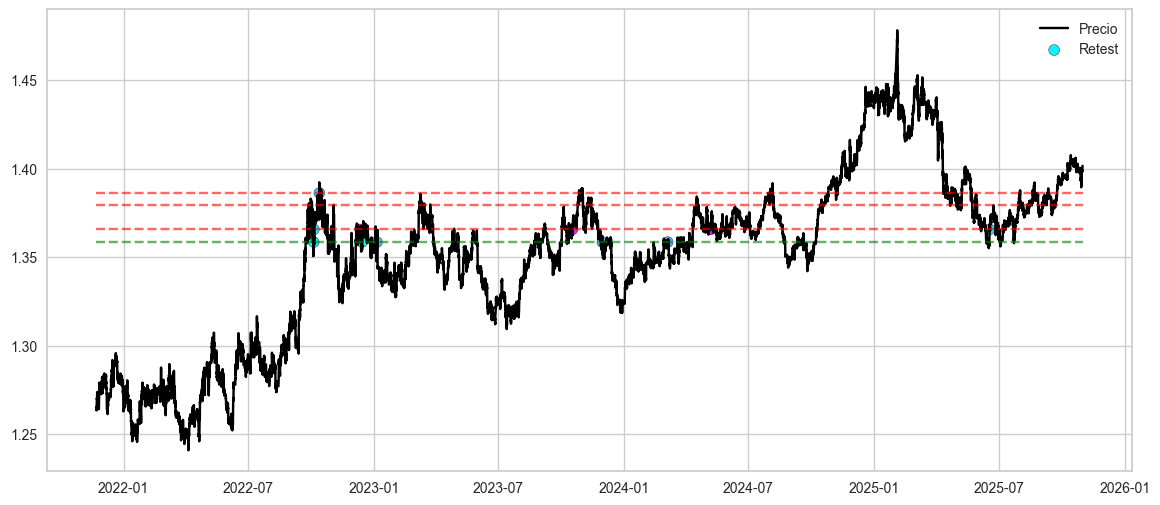

In [6]:
# ------------------------------------------------------------
# 0️⃣ Asegúrate de tener tus DataFrames df_di (diario) y df_1h (1H)
# df_di y df_1h deben tener columnas: ['open','high','low','close'] y un índice de tiempo
# ------------------------------------------------------------

# 1️⃣ Detectar zonas SR en diario
zonas_di = detectar_zonas_sr_mejorado(df_di)
print("Zonas diarias detectadas:\n", zonas_di)

# 2️⃣ Detectar quiebres estructurales en 1H usando zonas diarias
quiebres_4h = detectar_quiebres_estructurales_1h_mejorado(df_4h, zonas_di)
print("Quiebres estructurales 1H:\n", quiebres_1h)

# 3️⃣ Detectar retests confirmados en 1H
retests_1h = detectar_retests_1h_mejorado(df_1h, quiebres_1h)
print("Retests 1H (señales potenciales con score):\n", retests_1h)

# 4️⃣ Opcional: visualizar todo en gráfico
plot_zonas_quiebres_retests(df_1h, zonas_di, retests_1h)


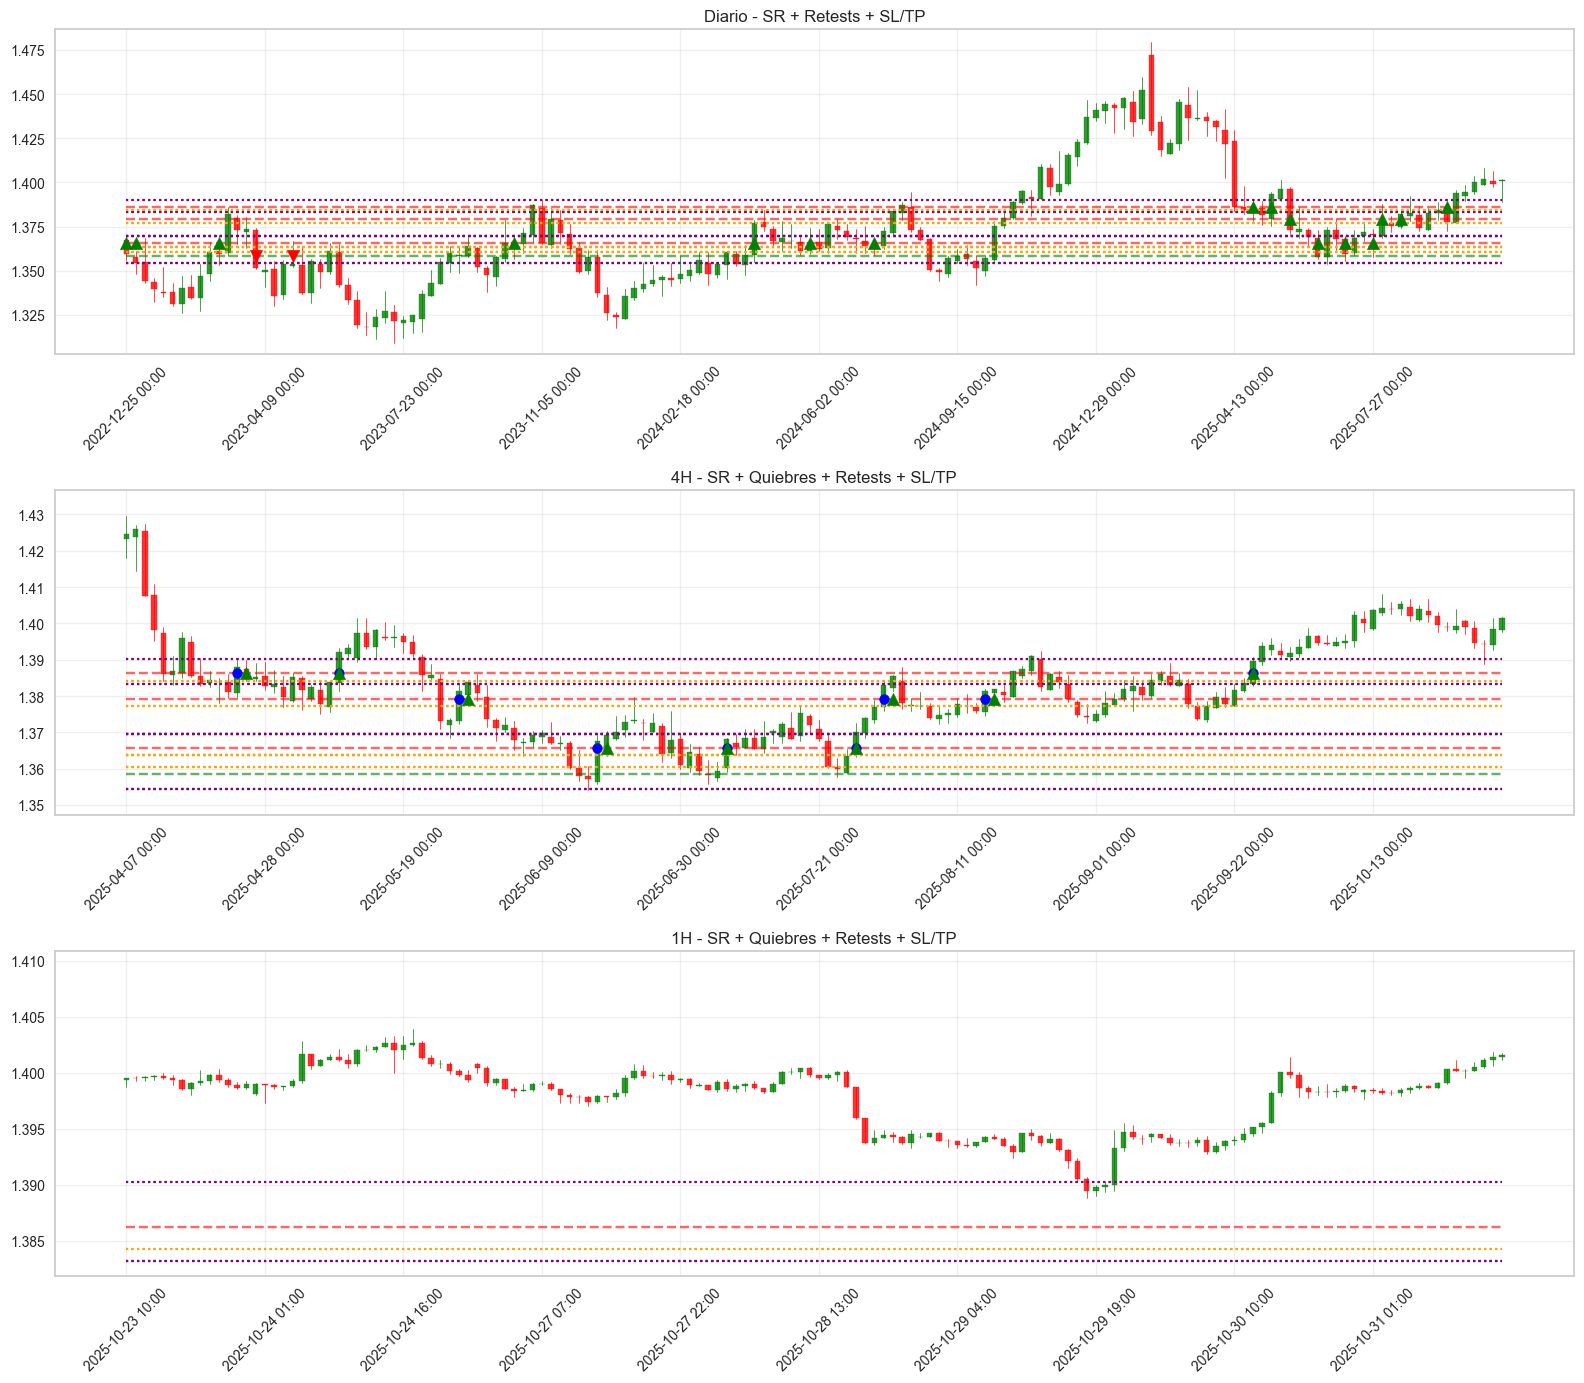

In [7]:
# ============================================================
# SISTEMA MEJORADO: ZONAS SR, QUIEBRES, RETESTS + SL/TP
# ============================================================

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# ---------------------------
# 1️⃣ Detectar zonas SR (diario)
# ---------------------------
def detectar_zonas_sr_mejorado(df, lookback_swing=5, tolerancia=0.0020, min_retests=3):
    df = df.copy()
    df['max_local'] = df['high'].rolling(lookback_swing, center=True).max()
    df['min_local'] = df['low'].rolling(lookback_swing, center=True).min()
    
    piv_res = df[df['high'] == df['max_local']]
    piv_sup = df[df['low'] == df['min_local']]
    
    res_precio = piv_res['high'].values.reshape(-1,1)
    sup_precio = piv_sup['low'].values.reshape(-1,1)
    res_tiempo = piv_res.index.to_numpy()
    sup_tiempo = piv_sup.index.to_numpy()
    
    def clusterizar(precios, tiempos, min_samples):
        if len(precios) == 0: return []
        clustering = DBSCAN(eps=tolerancia, min_samples=min_samples).fit(precios)
        niveles = []
        for c in set(clustering.labels_):
            if c == -1: continue
            mask = clustering.labels_ == c
            nivel = precios[mask].mean()
            tiempo = tiempos[mask][-1]
            niveles.append({'precio': nivel, 'time': tiempo})
        return niveles
    
    niveles_resistencia = [{'tipo':'resistencia', **n} for n in clusterizar(res_precio, res_tiempo, min_retests)]
    niveles_soporte    = [{'tipo':'soporte', **n} for n in clusterizar(sup_precio, sup_tiempo, min_retests)]
    
    zonas_df = pd.DataFrame(niveles_resistencia + niveles_soporte)
    zonas_df.sort_values('precio', inplace=True)
    zonas_df.reset_index(drop=True, inplace=True)
    return zonas_df

# ---------------------------
# 2️⃣ Detectar quiebres estructurales (1H o 4H)
# ---------------------------
def detectar_quiebres_estructurales(df_tf, zonas_di, porcentaje_quiebre=0.002):
    quiebres = []
    for _, zona in zonas_di.iterrows():
        tipo, nivel = zona['tipo'], zona['precio']
        precio_high = df_tf['high'].values
        precio_low  = df_tf['low'].values
        precio_close = df_tf['close'].values
        times = df_tf.index.to_numpy()
        for i in range(1, len(df_tf)):
            prev_low, prev_high = precio_low[i-1], precio_high[i-1]
            act_low, act_high, act_close = precio_low[i], precio_high[i], precio_close[i]
            if tipo=='soporte' and prev_low > nivel and act_low <= nivel*(1-porcentaje_quiebre):
                quiebres.append({'tipo':'baja', 'nivel_quebrado':nivel, 'time': times[i], 'fuerza': act_high-act_low})
            elif tipo=='resistencia' and prev_high < nivel and act_high >= nivel*(1+porcentaje_quiebre):
                quiebres.append({'tipo':'alza', 'nivel_quebrado':nivel, 'time': times[i], 'fuerza': act_high-act_low})
    return pd.DataFrame(quiebres)

# ---------------------------
# 3️⃣ Detectar retests + SL/TP
# ---------------------------
def detectar_retests_1h_mejorado(df_1h, quiebres_1h, SL_pips=0.0020, TP_pips=0.0040, max_velas_post=40):
    retests = []
    precio_high = df_1h['high'].values
    precio_low  = df_1h['low'].values
    precio_close = df_1h['close'].values
    times = df_1h.index.to_numpy(dtype='datetime64[ns]')
    
    for _, q in quiebres_1h.iterrows():
        nivel, tipo, fuerza_quiebre = q['nivel_quebrado'], q['tipo'], q['fuerza']
        time_q = pd.Timestamp(q['time'])
        start_idx = np.searchsorted(times, np.datetime64(time_q)) + 1
        end_idx = min(start_idx + max_velas_post, len(df_1h))
        for i in range(start_idx, end_idx):
            min_v, max_v, close_v = precio_low[i], precio_high[i], precio_close[i]
            if min_v <= nivel <= max_v:
                if tipo == 'alza' and close_v > nivel:
                    score = fuerza_quiebre / (max_v - min_v + 1e-6)
                    retests.append({
                        'signal':'long', 'nivel':nivel, 'time':times[i], 'score':score,
                        'SL': nivel - SL_pips, 'TP': nivel + TP_pips
                    })
                    break
                elif tipo == 'baja' and close_v < nivel:
                    score = fuerza_quiebre / (max_v - min_v + 1e-6)
                    retests.append({
                        'signal':'short', 'nivel':nivel, 'time':times[i], 'score':score,
                        'SL': nivel + SL_pips, 'TP': nivel - TP_pips
                    })
                    break
    return pd.DataFrame(retests)

# ---------------------------
# 4️⃣ Graficar multi-timeframe con SL/TP
# ---------------------------
def plot_candles_multitimeframe_continuo(df_di, df_4h, df_1h, zonas_di, quiebres_4h, retests_1h,
                                         n_last_di=200, n_last_4h=200, n_last_1h=200,
                                         tolerancia=0.0015):
    import matplotlib.pyplot as plt
    from mplfinance.original_flavor import candlestick_ohlc
    import numpy as np
    import pandas as pd

    # -------------------------------
    # Filtrar zonas relevantes
    def filtrar_zonas_relevantes(zonas_df, df_precio, tolerancia=0.0050):
        zonas_filtradas = []
        for _, z in zonas_df.iterrows():
            tipo, nivel = z['tipo'], z['precio']
            if tipo=='soporte':
                tocadas = (abs(df_precio['low'] - nivel)/nivel < tolerancia).sum()
            else:
                tocadas = (abs(df_precio['high'] - nivel)/nivel < tolerancia).sum()
            if tocadas>1:
                zonas_filtradas.append(z)
        return pd.DataFrame(zonas_filtradas)
    
    zonas_di_di = filtrar_zonas_relevantes(zonas_di, df_di, tolerancia)
    zonas_di_4h = filtrar_zonas_relevantes(zonas_di, df_4h, tolerancia)
    zonas_di_1h = filtrar_zonas_relevantes(zonas_di, df_1h, tolerancia)

    fig, axes = plt.subplots(3,1, figsize=(16,14), sharex=False)

    # -------------------------------
    # Función para graficar cada subplot
    def graficar_subplot(ax, df, zonas=None, quiebres=None, retests=None, titulo='', n_last=200):
        df_plot = df.iloc[-n_last:].copy()[['open','high','low','close']]
        df_plot['x'] = np.arange(len(df_plot))
        ohlc = df_plot[['x','open','high','low','close']].values
        ancho_vela = 0.6 if len(df_plot)<300 else 0.5*300/len(df_plot)
        candlestick_ohlc(ax, ohlc, width=ancho_vela, colorup='green', colordown='red', alpha=0.8)
        
        # Zonas SR
        if zonas is not None:
            for _, z in zonas.iterrows():
                color = 'green' if z['tipo']=='soporte' else 'red'
                ax.hlines(z['precio'], df_plot['x'].min(), df_plot['x'].max(),
                          colors=color, linestyles='--', alpha=0.6)

        # Quiebres
        if quiebres is not None and not quiebres.empty:
            for _, q in quiebres.iterrows():
                if q['time'] in df_plot.index:
                    x = df_plot.index.get_loc(q['time'])
                    ax.scatter(x, q['nivel_quebrado'], s=50, color='blue', marker='o', zorder=5)

        # Retests y SL/TP
        if retests is not None and not retests.empty:
            delta = df_plot.index[1]-df_plot.index[0] if len(df_plot)>1 else pd.Timedelta('1H')
            for _, r in retests.iterrows():
                difs = abs(df_plot.index - r['time'])
                # Dibujar marcador solo si coincide temporalmente
                if difs.min() <= delta:
                    x = df_plot['x'].iloc[difs.argmin()]
                    color = 'green' if r['signal']=='long' else 'red'
                    marker = '^' if r['signal']=='long' else 'v'
                    ax.scatter(x, r['nivel'], s=80, color=color, marker=marker, zorder=6)
                # SL y TP siempre proyectados
                if 'SL' in r and not pd.isna(r['SL']):
                    ax.hlines(r['SL'], df_plot['x'].min(), df_plot['x'].max(),
                              colors='orange', linestyles=':', linewidth=1.5, alpha=0.7)
                if 'TP' in r and not pd.isna(r['TP']):
                    ax.hlines(r['TP'], df_plot['x'].min(), df_plot['x'].max(),
                              colors='purple', linestyles=':', linewidth=1.5, alpha=0.7)

        ax.set_title(titulo)
        ax.set_ylim(df_plot['low'].min()*0.995, df_plot['high'].max()*1.005)
        ax.grid(True, alpha=0.3)
        step = max(1, len(df_plot)//10)
        ticks = df_plot['x'][::step]
        labels = [df_plot.index[i].strftime('%Y-%m-%d %H:%M') for i in range(0, len(df_plot), step)]
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels, rotation=45)

    # -------------------------------
    # Graficar todos los subplots
    graficar_subplot(axes[0], df_di, zonas=zonas_di_di, retests=retests_1h, titulo='Diario - SR + Retests + SL/TP', n_last=n_last_di)
    graficar_subplot(axes[1], df_4h, zonas=zonas_di_4h, quiebres=quiebres_4h, retests=retests_1h,
                     titulo='4H - SR + Quiebres + Retests + SL/TP', n_last=n_last_4h)
    graficar_subplot(axes[2], df_1h, zonas=zonas_di_1h, quiebres=quiebres_4h, retests=retests_1h,
                     titulo='1H - SR + Quiebres + Retests + SL/TP', n_last=n_last_1h)

    plt.tight_layout()
    plt.show()


# ---------------------------
# 5️⃣ EJEMPLO DE EJECUCIÓN
# ---------------------------
# df_di, df_4h, df_1h deben estar definidos con columnas ['open','high','low','close'] y índice datetime

# Detectar zonas SR
zonas_di = detectar_zonas_sr_mejorado(df_di)

# Detectar quiebres
quiebres_4h = detectar_quiebres_estructurales(df_4h, zonas_di)

# Detectar retests con SL/TP
retests_1h = detectar_retests_1h_mejorado(df_1h, quiebres_4h)

# Graficar todo
plot_candles_multitimeframe_continuo(df_di, df_4h, df_1h, zonas_di, quiebres_4h, retests_1h,
                                     n_last_di=150, n_last_4h=150, n_last_1h=150)


In [8]:
R

NameError: name 'R' is not defined